<a href="https://colab.research.google.com/github/HOSEI-UNIV-IIST/introduction_to_ml_with_python/blob/master/23R8105_handshap_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !unzip handshapedata\ \(1\).zip

# Import libraries

In [ ]:
import os
import numpy as np
from skimage import io  # Using skimage to read images, but you can use other libraries like OpenCV or PIL
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# TASK 1

## Reading of data

1. Navigate Through the Folder Hierarchy:
2. Create an Image-File List:
3. Load Images & Assign Labels:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


# Base path where 'handshapedata' is located
#base_path = './handshapedata'
base_path = '/content/drive/MyDrive/handshapedata'

# Lists to store image data and labels
images = []
labels = []

# Navigating through the folders
for main_folder in sorted(os.listdir(base_path)):  # Assuming folders are like m01, m02,...,m16
    main_folder_path = os.path.join(base_path, main_folder)

    # Check if it's a folder (to avoid reading any other files accidentally)
    if os.path.isdir(main_folder_path):
        for sub_folder in sorted(os.listdir(main_folder_path)):  # Sub-folders are 0 to 5
            sub_folder_path = os.path.join(main_folder_path, sub_folder)

            # Reading images from the sub-folder
            for img_file in sorted(os.listdir(sub_folder_path)):
                if img_file.endswith(".png"):  # Check if the file is an image
                    img_path = os.path.join(sub_folder_path, img_file)

                    # Load the image
                    img = io.imread(img_path)
                    images.append(img)

                    # Assign label based on the sub-folder name
                    labels.append(int(sub_folder))


Mounted at /content/drive


In [ ]:
# Unmount Google Drive
drive.flush_and_unmount()

## Convert lists of images to numpy arrays
- images array
- labels array

In [ ]:
# Convert lists to numpy arrays
images_np = np.array(images)
labels_np = np.array(labels)

### Describing the Data

#### - Find out the number of images.
#### - Determine the shape of an individual image.
#### - Inspect the unique labels.

In [ ]:
print(f"Total number of images: {images_np.shape[0]}")
print(f"Shape of an individual image: {images_np[0].shape}")
print(f"Unique labels: {np.unique(labels_np)}")


Total number of images: 9600
Shape of an individual image: (40, 40, 3)
Unique labels: [0 1 2 3 4 5]


### Visualizing the Data

Display the first few images.

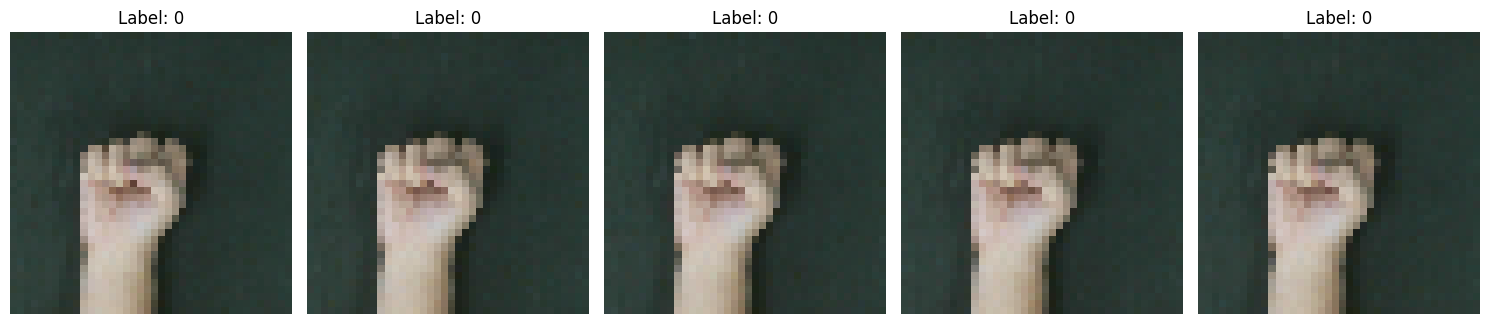

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axs[i].imshow(images_np[i], cmap='gray')  # assuming grayscale images
    axs[i].set_title(f"Label: {labels_np[i]}")
    axs[i].axis('off')
plt.tight_layout()
plt.show()

Show the distribution of labels.

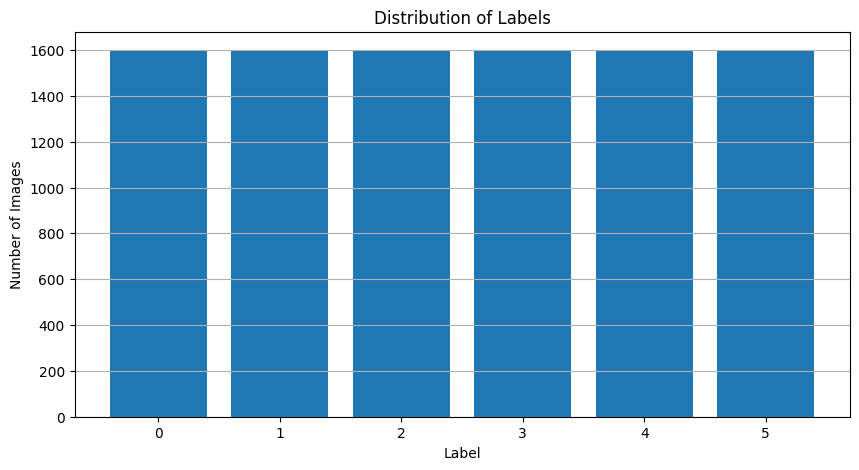

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(labels_np, bins=np.arange(-0.5, 6.5, 1), rwidth=0.8)
plt.xticks(np.arange(0, 6))
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.title('Distribution of Labels')
plt.grid(axis='y')
plt.show()

# TASK 2

### In this part, we're going to explore deeply five classification algorithms:
1. Convolutional Neural Networks (CNNs)
2. Support Vector Machines (SVMs)
3. Random Forests
4. k-Nearest Neighbors (k-NN)
5. Logistic Regression

## Apply machine learning classification and show accuracy on the randomly-selected 20% test images.

### To apply machine learning classification and evaluate its accuracy on the 20% test images, we need to:

 - Split the dataset into 80% training and 20% testing.
 - Train a classifier on the training data.
 - Evaluate the classifier on the test data and report the accuracy.

For simplicity, we choose to start with Random Forest Classifier, as it doesn't require much parameter tuning to get started.✌️

For more detail: [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

### SKLearn is our best friend here, so import require librairies

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Reshape the images array from 4D to 2D
Also, we can just skip this by using image_np.shape[0]

Basicaly, current shape is like: num_samples, height, width, channels

In [ ]:
# Reshape the images_np array to 2D
num_samples, height, width, channels = images_np.shape
images_reshaped = images_np.reshape(num_samples, height * width * channels)

# Copy reshaped images and labels we processed earlier
X = images_reshaped.copy()
y = labels_np.copy()

### Split the data into training and testing sets

In [ ]:
# Split the new data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initialize a random forest classifier

In [ ]:
# We keep random_state for reproduction the same result
clf = RandomForestClassifier(n_estimators=100, random_state=42)

### Train the classifier

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predict on the test data

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([1, 5, 0, ..., 2, 0, 1])

### Calculate the accuracy

In [ ]:
# Calculate the accuracy: Number of Correct Prediction / Number of Total Prediction
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.59%


### Understanding the Accuracy with 1.41% or error

98.59 an impressive accuracywhich means that the classification model chose (Random Forest Classifier) correctly predicted the class labels for approximately 98.59% of the test samples in our dataset. This suggests that the model has learned the patterns in the training data quite well and is able to generalize effectively to unseen data.

However, It might be overfitted. Wen cannot talk about Imballanced dataset since our data is well distributed as we seen in #Task1.

Let's take a few time to do Error Analysis to understand deeply.

#### 1) Confusion Matrix: to understand which classes are confused by our model

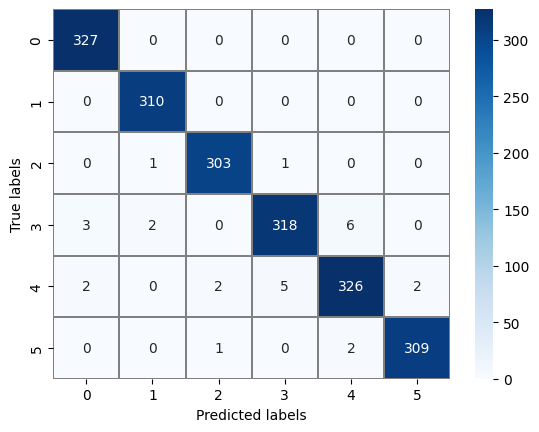

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            linewidths=0.2, linecolor='gray')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


#### 2) Analyze Individual Mistakes: to provide insight into why certain errors might be occurring

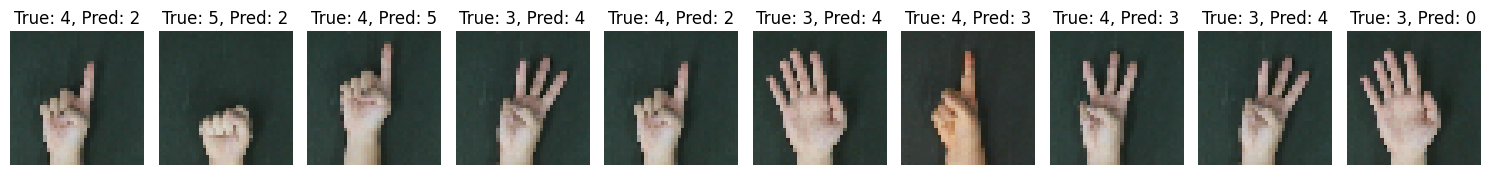

In [ ]:
misclassified_idx = np.where(y_test != y_pred)[0]
sample_idx = np.random.choice(misclassified_idx, 10)  # Showing some random misclassified images

plt.figure(figsize=(15, 5))  # Adjust the figure size to comfortably fit the images

for i, idx in enumerate(sample_idx):
    plt.subplot(1, 10, i + 1)  # 1 row, 10 columns, current column (i+1)
    plt.imshow(images_np[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

#### 3) Class Distribution

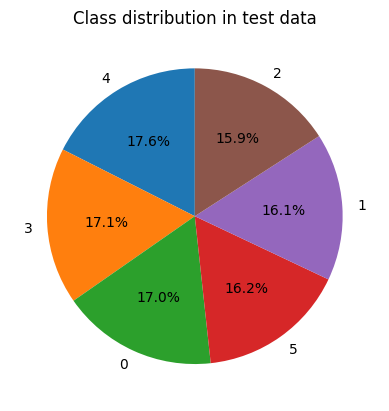

In [ ]:
# pd.Series(y_test).value_counts().plot()
pd.Series(y_test).value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Class distribution in test data')
plt.show()

#### 4) Performance metric: to make sure our error produced is or not a problem even if we can stop here since our test data is not imbalanced.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       327
           1       0.99      1.00      1.00       310
           2       0.99      0.99      0.99       305
           3       0.98      0.97      0.97       329
           4       0.98      0.97      0.97       337
           5       0.99      0.99      0.99       312

    accuracy                           0.99      1920
   macro avg       0.99      0.99      0.99      1920
weighted avg       0.99      0.99      0.99      1920



Precision, Recall, and F1-score for Each Class (0 through 5)

**Precision**: Out of all the predictions made for a particular class, how many were correct. here, our algorithm returned substantially more relevant results than irrelevant ones.

**Recall** (or Sensitivity): Out of all the actual instances of a class, how many were correctly predicted by the model. Here, Random Forest algorithm returned most of the relevant results.

**F1-score**: Harmonic mean of precision and recall, it provides a single score that balances both the concerns of precision and recall in one number.

**Support**: The number of actual occurrences of the class in the dataset.
From the table, it appears that each class has high precision, recall, and F1-score values, close to 1. This indicates a strong performance in the classification task for each individual class.

From Confusion Matrix to Performance metric, we can conclude that our model works well without overfitting.

However, while the numbers look excellent, our position is to make sure to test the model in real-world scenarios or with unseen data to ensure its true performance. 🤝

## Study deeply three or more classifying algorithms, and be ready to explain them to the class.

#### Importation of common Necessary Libraries

In [ ]:
# CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# SVM, RandomForest
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from scipy.stats import reciprocal, uniform

from sklearn.ensemble import RandomForestClassifier

#!pip install bayesian-optimization
from bayes_opt import BayesianOptimization


#### Splitting the data for all models

In [ ]:
# Reshaping images
#num_samples, height, width, channels = images_np.shape
#images_reshaped = images_np.reshape(num_samples, height * width * channels)

# Copy reshaped images and labels we processed earlier
X = images_np
y = labels_np

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Convolutional Neural Networks (CNNs) Study

#### 1) Importation of CNNs libs

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#### 2) Data Processing

In [ ]:
# Check if images are RGB or not by looking into their shape

if len(X[0].shape) == 3:
    if X[0].shape[2] == 3:
        print("The images are RGB.")
    elif X[0].shape[2] == 1:
        print("The images are grayscale.")
else:
    print("The images are grayscale.")

The images are RGB.


In [ ]:
# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

#### 3) Building the CNN

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(6, activation='softmax')) # 6 classes for hand shapes

#### 4) Training

In [ ]:
# Compiling the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = cnn_model.fit(X_train, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test, y_test_encoded))


Epoch 1/10
120/120 [==============================] - 22s 176ms/step - loss: 0.7869 - accuracy: 0.7141 - val_loss: 0.2733 - val_accuracy: 0.9240
Epoch 2/10
120/120 [==============================] - 19s 155ms/step - loss: 0.1620 - accuracy: 0.9551 - val_loss: 0.1069 - val_accuracy: 0.9714
Epoch 3/10
120/120 [==============================] - 18s 150ms/step - loss: 0.0713 - accuracy: 0.9807 - val_loss: 0.0681 - val_accuracy: 0.9776
Epoch 4/10
120/120 [==============================] - 19s 161ms/step - loss: 0.0522 - accuracy: 0.9844 - val_loss: 0.0398 - val_accuracy: 0.9891
Epoch 5/10
120/120 [==============================] - 21s 178ms/step - loss: 0.0271 - accuracy: 0.9921 - val_loss: 0.0422 - val_accuracy: 0.9870
Epoch 6/10
120/120 [==============================] - 19s 154ms/step - loss: 0.0262 - accuracy: 0.9921 - val_loss: 0.0165 - val_accuracy: 0.9958
Epoch 7/10
120/120 [==============================] - 18s 150ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 0.0223 - val_ac

#### 5) Evaluation

In [ ]:
# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(X_test, y_test_encoded)
print(f"Test accuracy: {test_acc}")


60/60 [==============================] - 3s 45ms/step - loss: 0.0164 - accuracy: 0.9953
Test accuracy: 0.995312511920929


#### Parameter tuning


It is essential to optimize the performance of our CNN model with parameter tuning. To do so, we can use Keras' GridSearchCV or RandomizedSearchCV in combination with Keras' KerasClassifier wrapper for this purpose.

##### 1. Creation of a Model Function

In [ ]:
!pip install keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_model(optimizer='adam', conv_layers=2, filters=32):
    model = tf.keras.Sequential()
    model.add(Conv2D(filters, (3, 3), activation='relu', input_shape=(height, width, channels)))
    model.add(MaxPooling2D((2, 2)))

    for i in range(1, conv_layers):
        model.add(Conv2D(filters, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


##### 2. Setting Up Parameter Grid

For simplicity, we just tune the learning rate of the Adam optimizer.

1. The total number of images is 9600, which means we have a decent-sized dataset. However, the resolution of the images is relatively low, with each image being 40x40 pixels. This will impact the depth of our CNN.
2. We have 6 unique labels, which means the output layer will have **6 neurons**.
Considering these factors, let's adjust our parameter grid:

 - epochs: Training for more epochs can potentially improve performance until the model starts overfitting. For a dataset of this size, 10 or 20 epochs are commonly chosen for initial exploration. If overfitting doesn't occur, we can further increase it.
 - batch_size: Given the dataset size, batch sizes of 32, 64, or 128 are reasonable choices.
 - optimizer: 'adam' and 'rmsprop' are two popular choices.
 - conv_layers: Given the image size, it might not be feasible to have many convolutional layers. Hence, 2 or 3 is a reasonable choice in our case.
 - filters: Increasing the number of filters allows the network to capture more features. Start with smaller numbers like 32 or 64 or 128 🤓.

In [ ]:
#param_grid = {
#    'optimizer': [tf.keras.optimizers.Adam(learning_rate=lr) for lr in [0.001, 0.01]],
#    'conv_layers': [2, 3],
#    'filters': [32, 64]
#}

param_grid = {
    'epochs': [10, 20, 30],
    'batch_size': [32, 64, 128],
    'optimizer': ['adam', 'rmsprop'],
    'conv_layers': [2, 3],
    'filters': [32, 64]
}

##### 3. Hyperparameterizing Tuning with TensorFlow

In [ ]:
from keras_tuner.tuners import RandomSearch

def build_model(hp):
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.01]))
    conv_layers = hp.Choice('conv_layers', [2, 3])
    filters = hp.Choice('filters', [32, 64])

    return create_model(optimizer=optimizer, conv_layers=conv_layers, filters=filters)

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of model configurations
    directory='output_dir',
    project_name='hptune'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)


Using TensorFlow backend
Reloading Tuner from output_dir/hptune/tuner0.json


#### Comparison between the Base model and Tuning model

##### Definition of Baseline Model Fucntion

In [ ]:
def baseline_model(input_shape):
    cnn_bm = Sequential()
    cnn_bm.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    cnn_bm.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_bm.add(Flatten())
    cnn_bm.add(Dense(64, activation='relu'))
    cnn_bm.add(Dense(6, activation='softmax'))  # 6 classes as per your unique labels
    cnn_bm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return cnn_bm

baseline = baseline_model((40, 40, 3))
baseline.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 19, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 11552)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                739392    
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 740678 (2.83 MB)
Trainable params: 740678 (2.83 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

##### training the Baseline Model

In [ ]:
cnn_baseline_history = baseline.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
240/240 [==============================] - 21s 86ms/step - loss: 0.8060 - accuracy: 0.7215 - val_loss: 0.3855 - val_accuracy: 0.9083
Epoch 2/10
240/240 [==============================] - 20s 84ms/step - loss: 0.2580 - accuracy: 0.9342 - val_loss: 0.2078 - val_accuracy: 0.9484
Epoch 3/10
240/240 [==============================] - 23s 98ms/step - loss: 0.1289 - accuracy: 0.9674 - val_loss: 0.2012 - val_accuracy: 0.9323
Epoch 4/10
240/240 [==============================] - 26s 109ms/step - loss: 0.0751 - accuracy: 0.9832 - val_loss: 0.0798 - val_accuracy: 0.9781
Epoch 5/10
240/240 [==============================] - 20s 82ms/step - loss: 0.0446 - accuracy: 0.9900 - val_loss: 0.0800 - val_accuracy: 0.9828
Epoch 6/10
240/240 [==============================] - 11s 46ms/step - loss: 0.0262 - accuracy: 0.9954 - val_loss: 0.0543 - val_accuracy: 0.9828
Epoch 7/10
240/240 [==============================] - 11s 46ms/step - loss: 0.0157 - accuracy: 0.9982 - val_loss: 0.0670 - val_accuracy

##### Training the Tuned Model

In [ ]:
# Let's say the best parameters from tuning were:
best_params = {
    'optimizer': 'adam',
    'conv_layers': 3,
    'filters': 64
}

tuned = create_model(**best_params)
tuned.summary()

cnn_tuned_history = tuned.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 38, 38, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 19, 19, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 17, 17, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 64)         

##### Comparison

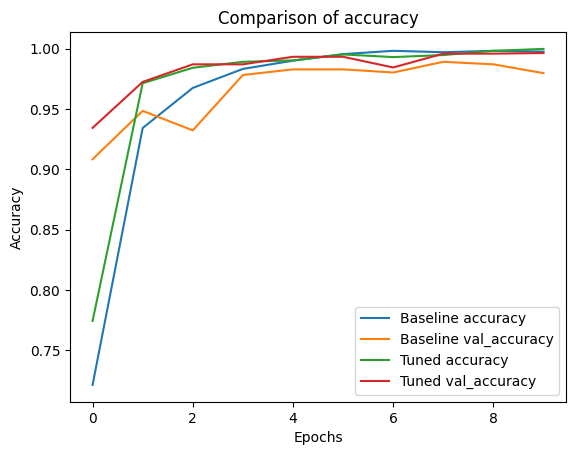

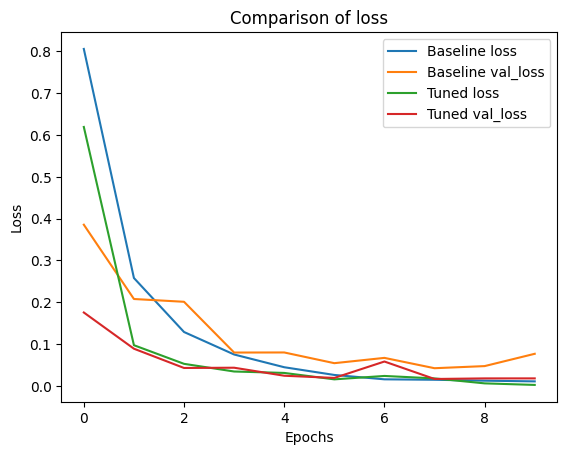

In [ ]:
# Visualization
def plot_comparison(history1, history2, metric):
    plt.plot(cnn_baseline_history.history[metric], label=f"Baseline {metric}")
    plt.plot(cnn_baseline_history.history['val_' + metric], label=f"Baseline val_{metric}")
    plt.plot(cnn_tuned_history.history[metric], label=f"Tuned {metric}")
    plt.plot(cnn_tuned_history.history['val_' + metric], label=f"Tuned val_{metric}")
    plt.title(f"Comparison of {metric}")
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Compare accuracy
plot_comparison(cnn_baseline_history, cnn_tuned_history, 'accuracy')
# Compare loss
plot_comparison(cnn_baseline_history, cnn_tuned_history, 'loss')

#### Analyzing the above output plots of _accuracy_ and _loss_ for both the **baseline** and the **tuned** models across epochs, we can draw the following conclusions:

1. **Accuracy Comparison**:
    - **Tuned Model**:
        - The accuracy of the tuned model starts off high and remains consistently high throughout the epochs.
        - The validation accuracy also remains close to the training accuracy, suggesting that the model generalizes well to unseen data.
    - **Baseline Model**:
        - The baseline model's accuracy starts lower than that of the tuned model and rises with each epoch.
        - There's a clear gap between the training and validation accuracy, which indicates a potential overfitting scenario where the model performs well on the training data but less so on the validation data.
    - Comparing the two, the tuned model outperforms the baseline in terms of both training and validation accuracy.

2. **Loss Comparison**:
    - **Tuned Model**:
        - The loss starts off very low and remains consistently low throughout the epochs.
        - The validation loss remains close to the training loss, further confirming good generalization.
    - **Baseline Model**:
        - The training loss for the baseline decreases sharply initially, and then slowly decreases further.
        - The validation loss for the baseline is relatively flat, which again suggests overfitting, as the model is getting better on the training data without a corresponding improvement on the validation data.
    - The tuned model again clearly outperforms the baseline model in terms of both training and validation loss.

**Overall Conclusion**:
The tuned model is superior to the baseline model both in terms of accuracy and loss. The tuning process has clearly improved model performance by optimizing hyperparameters and architecture to better suit the dataset.

However, it's always essential to also consider other factors:
- **Model Complexity**: While the tuned model is more accurate, it might be more complex (depending on the hyperparameters used). This could lead to increased computational resources or time required for predictions.
- **Deployment Considerations**: If deploying in resource-constrained environments, you might have to strike a balance between accuracy and model size or computational demands.
- **Further Improvements**: While the tuned model is clearly superior now, it's always possible that with more data, further hyperparameter tuning, or other techniques like data augmentation, performance could be further improved.

Lastly, while the current results are promising, it's crucial to validate the model's performance on a completely separate test set (if available) to ensure its efficacy in real-world scenarios.

### Support Vector Machines (SVMs) Study:

#### 1) Splitting the data

In [ ]:
# Convert images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Reshape the images to 1D (flattening)
images_flat = images.reshape(images.shape[0], -1)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(images_flat, labels, test_size=0.2, random_state=42)


#### 2) Scale the data (important for SVM)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 3) Initialize SVM classifier

In [ ]:
svm_model = SVC(kernel='linear', C=1)

#### 4) Train the classifier


In [ ]:
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

#### 5) Predict labels for test data

In [ ]:
y_pred = svm_model.predict(X_test)

#### 6) Calculate accuracy


In [ ]:
svm_baseline_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM: {svm_baseline_accuracy*100:.2f}%")

Accuracy of SVM: 97.86%


#### Tuning

##### 1. Grid Search

 - Train SVM models using different parameter combinations.
 - Find the best combination.
 - Evaluate its accuracy on the test set.

In [ ]:
# Define params
#param_grid = {
#    'C': [0.1, 1, 10, 100],
#    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#    'degree': [2, 3, 4],
#    'gamma': ['scale', 'auto']
#}

# Initialize Grid Search model
#svm_grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=2, n_jobs=-1)

#Train SVM models using different parameter combinations.
#svm_grid_search.fit(X_train, y_train)

# Mesure accuracy
#svm_grid_accuracy = accuracy_score(y_test, svm_grid_search.predict(X_test))


##### 2. Randomized Search:

Train SVM models using a random selection of parameter combinations.
Find the best combination.
Evaluate its accuracy on the test set.

In [ ]:
# Define params
#param_dist = {
#    'C': reciprocal(0.1, 1000),
#    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#    'degree': [2, 3, 4],
#    'gamma': ['scale', 'auto']
#}

# Initialize RandomizedSearchCV model
#svm_rand_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=100, cv=5, verbose=2, n_jobs=-1)

#Train RandomizedSearchCV model using different parameter combinations.
#svm_rand_search.fit(X_train, y_train)

# Mesure accuracy
#svm_rand_accuracy = accuracy_score(y_test, svm_rand_search.predict(X_test))


##### 3. Bayesian Optimization:

 - Use Bayesian optimization to find the best parameter combination.
 - Train the SVM model with this combination.
 - Evaluate its accuracy on the test set.

In [ ]:
# Define the objective function for Bayesian Optimization
def objective(params):
    clf = SVC(**params)
    acc = cross_val_score(clf, X_train, y_train, cv=5).mean()
    return {'loss': -acc, 'status': STATUS_OK}

# Define the space of hyperparameters to search
space = {
    'C': hp.loguniform('C', np.log(0.1), np.log(1000)),
    'kernel': hp.choice('kernel', ['linear', 'rbf', 'poly', 'sigmoid']),
    'degree': hp.choice('degree', [2, 3, 4]),
    'gamma': hp.choice('gamma', ['scale', 'auto'])
}

# Run the optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

best_params = {
    'C': best['C'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'][best['kernel']],
    'degree': [2, 3, 4][best['degree']],
    'gamma': ['scale', 'auto'][best['gamma']]
}

clf = SVC(**best_params)
clf.fit(X_train, y_train)
svm_bayes_accuracy = accuracy_score(y_test, clf.predict(X_test))


  6%|▌         | 3/50 [37:08<9:42:00, 742.99s/trial, best loss: -0.9907552083333332] 


KeyboardInterrupt: ignored

#### Comparison between baseline SVM model and Tuning Parameters

In [ ]:
accuracies = [svm_baseline_accuracy, svm_bayes_accuracy] # We have removed svm_grid_accuracy, to cost to compute
labels = ["Baseline", "Bayesian Opt"]

plt.barh(labels, accuracies)
plt.xlabel('Accuracy')
plt.ylabel('Method')
plt.title('Comparison of SVM Tuning Techniques')
plt.show()

When you've completed the model training and evaluation using different tuning strategies, you can derive several interpretations and conclusions from your results:

**1. Model Performance:**
- **Baseline Model**: This gives us the performance of the SVM without any hyperparameter tuning. It sets the benchmark for further improvements.
- **Grid Search**: It offers a systematic approach to find the best combination of parameters. However, it can be computationally expensive as it checks all possible combinations.
- **Random Search**: By randomly sampling from the distribution of hyperparameters, it might find a better combination in less time than Grid Search. However, there's no certainty that it will always outperform Grid Search.
- **Bayesian Optimization**: This technique builds a probabilistic model of the function mapping from hyperparameter values to the objective value. It is usually faster than random and grid search and can achieve similar or even better results with fewer evaluations.

**2. Computational Time:**
We can comment on the time taken by each method. Typically, Grid Search might take longer due to its exhaustive nature. Bayesian Optimization is expected to be efficient, potentially giving better results with fewer evaluations.

**3. Optimal Parameters:**
Discuss the optimal parameters found by each method and see if there are commonalities or differences. This can shed light on the stability and reliability of each tuning approach.

**Conclusions:**

- **Efficacy of Hyperparameter Tuning**: We can conclude about the importance of hyperparameter tuning by comparing the baseline model's performance with tuned models.
  
- **Best Method for the Dataset**: Depending on the dataset's size, dimensionality, and the distribution of data, some methods might be more effective than others. For example, if Random Search or Bayesian Optimization provides a similar accuracy to Grid Search but in a fraction of the time, it might be the preferred method for larger datasets.

- **Recommendation for Future Works**: Depending on your results, we can recommend using a particular method for similar tasks or datasets. If Bayesian Optimization works particularly well, it might be worthwhile to invest in more sophisticated probabilistic modeling techniques for hyperparameter tuning in future projects.

- **Potential Improvements**: If the accuracy or performance metric is still not satisfactory, conclude by suggesting other techniques. This could include using different algorithms, gathering more data, feature engineering, ensemble methods, or deeper architectures like CNNs for image tasks.


### Random Forest Study:

#### 1) Data Preprocessing:
Since Random Forest cannot work directly with image data, we need to reshape the images into a 1D vector.

In [ ]:
# Reshape the images
images = np.array(images).reshape(len(images), -1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(images, labels_np, test_size=0.2, random_state=42)


#### 2) Random Forest Baseline Model:


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
rf_baseline_accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Accuracy: : {rf_baseline_accuracy*100:.2f}%")


Baseline Accuracy: : 98.59%


#### 3) Hyperparameter Tuning:

##### 3.1 Grid Search

In [ ]:
#param_grid = {
#    'n_estimators': [50, 100, 150],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'bootstrap': [True, False]
#}

#grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
#                           cv=3, n_jobs=-1, verbose=2)

#grid_search.fit(X_train, y_train)
#rf_grid_search_best_params = grid_search.best_params_
#print(f"Best parameters from Grid Search: {rf_grid_search_best_params}")


##### 3.2. Random Search

In [ ]:
#random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
#                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

#random_search.fit(X_train, y_train)
#rf_random_search_best_params = random_search.best_params_
#print(f"Best parameters from Random Search: {rf_random_search_best_params}")

##### 3.3 Bayesian Optimization:

In [ ]:
def rf_crossval(n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap):
    # Convert some parameters to integer values
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    bootstrap = bool(bootstrap)

    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                bootstrap=bootstrap, random_state=42, n_jobs=-1)

    return np.mean(cross_val_score(rf, X_train, y_train, cv=3, scoring='accuracy'))

# Define the bounds for Bayesian optimization
bounds = {
    'n_estimators': (50, 150),
    'max_depth': (5, 50),
    'min_samples_split': (2, 11),
    'min_samples_leaf': (1, 5),
    'bootstrap': (0, 1)
}

optimizer = BayesianOptimization(
    f=rf_crossval,
    pbounds=bounds,
    random_state=42
)

optimizer.maximize(init_points=5, n_iter=10)
rf_bayes_best_params = optimizer.max['params']
print(f"Best parameters from Bayesian Optimization: {rf_bayes_best_params}")


|   iter    |  target   | bootstrap | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.9691    | 0.3745    | 47.78     | 3.928     | 7.388     | 65.6      |
| 2         | 0.9259    | 0.156     | 7.614     | 4.465     | 7.41      | 120.8     |
| 3         | 0.9677    | 0.02058   | 48.65     | 4.33      | 3.911     | 68.18     |
| 4         | 0.9721    | 0.1834    | 18.69     | 3.099     | 5.888     | 79.12     |
| 5         | 0.9701    | 0.6119    | 11.28     | 2.169     | 5.297     | 95.61     |
| 6         | 0.9678    | 1.0       | 15.5      | 1.0       | 11.0      | 50.0      |
| 7         | 0.9719    | 1.0       | 50.0      | 1.0       | 11.0      | 97.87     |
| 8         | 0.9781    | 1.0       | 50.0      | 1.0       | 2.0       | 150.0     |
| 9         | 0.9686    | 1.0       | 50.0      | 4.668     | 11.0      | 130.6     |
| 10        | 0.977     | 0.4231    | 33.19     | 1.04

#### 4) Compare Model Performance:

After tuning, we train our Random Forest model using the best parameters from each method and then compare their accuracies.

In [ ]:
# Baseline model
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)
rf_baseline_accuracy = accuracy_score(y_test, rf_baseline.predict(X_test))

In [ ]:

# Random Search model
#rf_rand = RandomForestClassifier(**rf_random_search_best_params, random_state=42)
#rf_rand.fit(X_train, y_train)
#rf_rand_accuracy = accuracy_score(y_test, rf_rand.predict(X_test))


In [ ]:

# Bayesian Optimization model
bayes_params_int = {
    'n_estimators': int(rf_bayes_best_params['n_estimators']),
    'max_depth': int(rf_bayes_best_params['max_depth']),
    'min_samples_split': int(rf_bayes_best_params['min_samples_split']),
    'min_samples_leaf': int(rf_bayes_best_params['min_samples_leaf']),
    'bootstrap': bool(rf_bayes_best_params['bootstrap'])
}

rf_bayes = RandomForestClassifier(**bayes_params_int, random_state=42)
rf_bayes.fit(X_train, y_train)
rf_bayes_accuracy = accuracy_score(y_test, rf_bayes.predict(X_test))

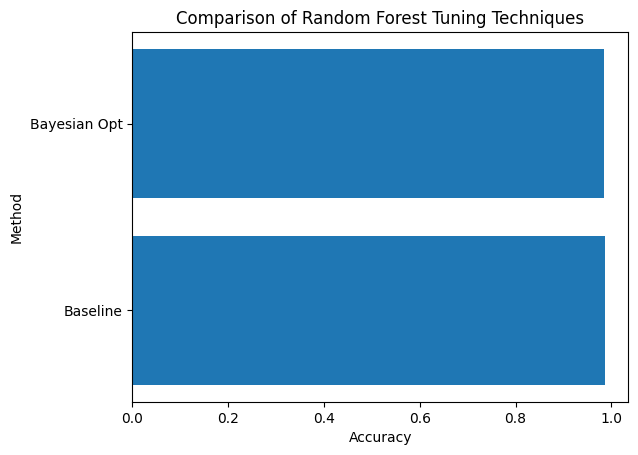

In [ ]:
# Plotting
accuracies = [rf_baseline_accuracy, rf_bayes_accuracy]
labels = ["Baseline", "Bayesian Opt"]

plt.barh(labels, accuracies)
plt.xlabel('Accuracy')
plt.ylabel('Method')
plt.title('Comparison of Random Forest Tuning Techniques')
plt.show()

## Compare three or more classifiers, try parameter tuning for better results, and discuss the results.